In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
len(df)

11914

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis

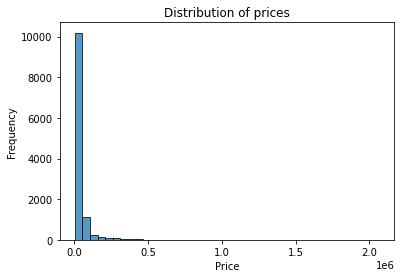

In [7]:
plt.figure(figsize=(6, 4))
plt.ylabel('Frequency')
plt.xlabel('Price')
plt. title('Distribution of prices')
sns.histplot(df.msrp, bins=40)
plt.show()

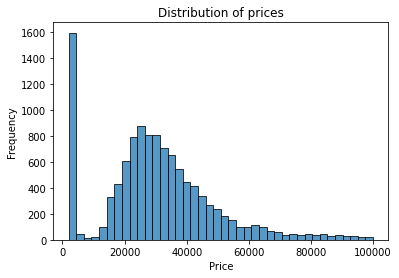

In [8]:
plt.figure(figsize=(6, 4))
plt.ylabel('Frequency')
plt.xlabel('Price')
plt. title('Distribution of prices')
sns.histplot(df.msrp[df.msrp < 100000], bins=40)
plt.show()

In [9]:
log_price = np.log1p(df.msrp)

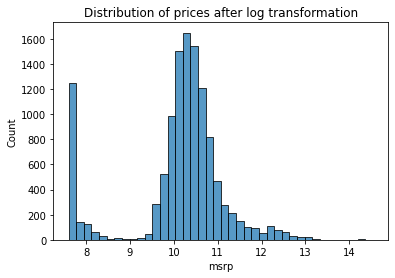

In [10]:
plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40)
plt.title('Distribution of prices after log transformation')
plt.show()

## Validation Framework

In [11]:
## Splitting Data into validation, test and training sets
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [12]:
## Initial analysis showed a long tail in the distribution of prices, and to remove its effect, we need to apply the log transformation
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

## To avoid accidentally using the target variable later, let's remove it from the dataframes
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [13]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_num = df_train[base]

In [14]:
df_num = df_num.fillna(0) # let's filling the missing values with zeros

X_train = df_num.values # convert this DataFrame to a NumPy array

## Linear Regresion

In [15]:
# Linear Regresion WIth NumPy
def train_linear_regression(X,y):
    # Adding the dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X]) #Adds the array of 1's as the first column of X
    
    # Normal Equation Formula
    XTX = X.T.dot(X) # Computes X^TX
    XTX_inv = np.linalg.inv(XTX) # Computes the inverse of X^TX
    w = XTX_inv.dot(X.T).dot(y) # Computes the rest of the normal equation
    
    return w[0], w[1:] # Splits the weights vector into the bias and the rest of weights

In [16]:
w_0, w = train_linear_regression(X_train, y_train) # We have just trained the first model ! 

In [17]:
y_pred = w_0 + X_train.dot(w) # Now we can apply it to the training data to see how well it predicts

To see how good the predictions are, we can use histplot to plot the predicted values and compare them with the actual prices:

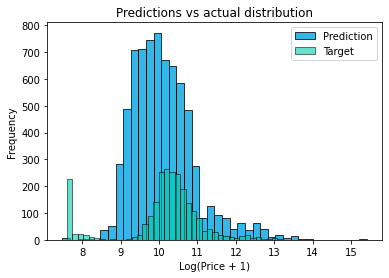

In [18]:
plt.figure(figsize=(6,4))

sns.histplot(y_pred, label='Prediction', color="#00A5E3", alpha=0.8, bins=40)
sns.histplot(y_val, label='Target', color="#00CDAC", alpha=0.6, bins=40)
plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

But we need to use a metric that quantifies the quality of the model.  
We can use many metrics to evaluate how we a regression model behaves.  
The most commonly used one is _root mean squared error_ RMSE for short  

RMSE tells us how large the errors ares that our model makes. It's computed with the following formula:  
RMSE = $\sqrt{ \frac{1}{m} \sum_{i=1}^m (g(x_i) - y_i)^2} $

In [19]:
# Implementation of RMSE
def rmse(y, y_pred):
    error = y_pred - y # difference between the prediction and the target 
    mse = (error ** 2).mean() #Compures MSE, first the sqared error, and then its mean
    return np.sqrt(mse) # takes the square root to get RMSE

In [20]:
rmse(y_train, y_pred)

0.7554192603920133

This number tells us that on average, the modelś predictions are off by 0.75. If one model has a better(lower) RMSE thant the other, it indicates that model is better

In [21]:
# LEt's create a X_VAL matrix
df_num = df_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values

In [22]:
y_pred = w_0 + X_val.dot(w)

Now we use y_pred and compare it with the actual prices from y-val, using the RMSE function

In [23]:
rmse(y_val, y_pred)

0.7616530991301607

Training and validations test require the same preprocessing, and we wrote the same code twice. Thus it makes sense to move this logic to a separate function an avoid duplicating the code

In [24]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [25]:
# Now training and evaluation becomes simpler, and looks like this:
X_train = prepare_X(df_train) # trains the model
w_0, w = train_linear_regression(X_train, y_train) 

X_val = prepare_X(df_val) # Applies the model to the validation dataset
y_pred = w_0 + X_val.dot(w)
print('validation: ', rmse(y_val, y_pred)) # Computes RMSE on the validation data

validation:  0.7616530991301607


## Feature Engineering

In [26]:
# The newer the car, the more expensive it should be
# the dataset was created en 2017, df_train.year.max() give us 2017
# To calculate the age, just subtracting the year when the car was made from 2017

df_train['age'] = 2017 - df_train.year

In [27]:
# Creating the age feature in the prepare_X function
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age') # Appends age to the list of feature names we use for the model
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [28]:
# Now let's test if adding the feature 'age' leads to any improvements
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.5175055465840046
validation: 0.5172055461058338


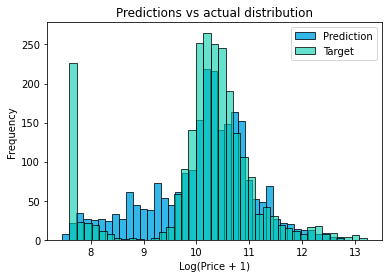

In [29]:
plt.figure(figsize=(6,4))

sns.histplot(y_pred, label='Prediction', color="#00A5E3", alpha=0.8, bins=40)
sns.histplot(y_val, label='Target', color="#00CDAC", alpha=0.6, bins=40)
plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

## Handling categorical variables

One of the simplest ways is to encode such varibales by a ser of binary features, with a separate feature for each distinct value

In [30]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age') # Appends age to the list of feature names we use for the model
    
    for v in [2,3,4]: ## This one is for the number of doors
        feature = 'num_doors_%s' % v # Gives a featrue a meaningful name, such as "num_doors_2" for v =2
        df[feature] = (df['number_of_doors'] == v).astype(int) # Creates the one-hot encoding feature
        features.append(feature)
        
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make%s' % v
        df[feature] =(df['make'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [31]:
# Let's check wheter this code improves the RMSE of the model
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.5058876515487503
validation: 0.5076038849556788


## Handling more categorical variables in the prepare_X function

In [32]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [33]:
# Let's check wheter this code improves the RMSE of the model
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 105.88539663181028
validation: 61.27589590853331


## Regularization

The aim of regularization is to make sure that the inverse exists by forcing the matrix to be investible.  
Regularization is an important concept in machine learning: it means "controlling" the weighst of the model so that they behave correctly and don't grow too large.  
One way to do regularization is to add a small number to each diagonal element of the matrix.

In [40]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X]) ## Adding a Dummy column
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0]) # alfa * Identity
    XTX = XTX + reg  # Ads r to the main diagonal of XTX
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [41]:
# Let's check wheter this code improves the model
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r =0.001)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.46431213476855837
validation: 0.460226763344266


In [43]:
# Now using r=0.1 we can check it against the test dataset
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r =0.01)


X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.4602394963538554
test: 0.4571813679898551


## Using the model

In [45]:
# suppose that a user posts the following ad on our site
ad = {
    'city_mpg' : 18,
    'driven_wheels' : 'all_wheel_drive',
    'engine_cylinders' : 6.0,
    'engine_fuel_type' : 'regular_unleaded',
    'engine_hp' : 268.0,
    'highway_mpg' : 25,
    'make' : 'toyota',
    'market_category' : 'crossover, performance',
    'model' : 'venza',
    'number_of_doors' : 4.0,
    'popularity' : 2031,
    'transmission_type' : 'automatic',
    'vehicle_size' : 'midsize',
    'vehicle_style' : 'wagon',
    'year' : 2013
}

## We'd like to suggest the price for this car, we use our model
df_test = pd.DataFrame([ad])
X_test = prepare_X(df_test)

# Now we can apply our model to hte matrix to predict the price of this car:
y_pred = w_0 + X_test.dot(w) # This predictions is not the final price, it's the logarithm of the price

suggestion = np.expm1(y_pred)
suggestion

array([28294.13589684])